IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

READ DATASET

In [2]:
df = pd.read_csv("Impact_of_Remote_Work_on_Mental_Health.csv")

sleep_quality_map = {'Poor': 1, 'Average': 2, 'Good': 3}
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3}
productivity_change_map = {'Decrease': -1, 'No Change': 0, 'Increase': 1}
satisfaction_map = {'Unsatisfied': -1, 'Neutral': 0, 'Satisfied': 1}
physical_activity_map = {'No': 0, 'Weekly': 1, 'Daily': 2}
Access_map = {'No': 0, 'Yes': 1}

df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)
df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
df['Productivity_Change'] = df['Productivity_Change'].map(productivity_change_map)
df['Satisfaction_with_Remote_Work'] = df['Satisfaction_with_Remote_Work'].map(satisfaction_map)
df['Access_to_Mental_Health_Resources'] = df['Access_to_Mental_Health_Resources'].map(Access_map)
df['Physical_Activity'] = df['Physical_Activity'].fillna('No')
df['Physical_Activity'] = df['Physical_Activity'].map(physical_activity_map)
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].fillna('Good')
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].replace({
    'Burnout': 'Burnout',
    'Anxiety': 'Burnout',
    'Depression': 'Burnout',
    'None': 'Good'
})

encoderMS = LabelEncoder()
encoderGender = LabelEncoder()
encoderJR = LabelEncoder()
encoderIndustry = LabelEncoder()
encoderWL = LabelEncoder()

df['Mental_Health_Condition'] = encoderMS.fit_transform(df['Mental_Health_Condition'])
df['Gender'] = encoderGender.fit_transform(df['Gender'])
df['Job_Role'] = encoderJR.fit_transform(df['Job_Role'])
df['Industry'] = encoderIndustry.fit_transform(df['Industry'])
df['Work_Location'] = encoderWL.fit_transform(df['Work_Location'])

DESCRIPTIVE ANALYSIS

In [3]:
df.info()
# print(df.describe(include='number'))

# df['Mental_Health_Condition'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   int64 
 3   Job_Role                           5000 non-null   int64 
 4   Industry                           5000 non-null   int64 
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   int64 
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   int64 
 11  Mental_Health_Condition            5000 non-null   int64 
 12  Access

IDENTIFYING MISSING VALUE

In [4]:
df.isnull().sum()

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

In [5]:
df.dropna()

for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

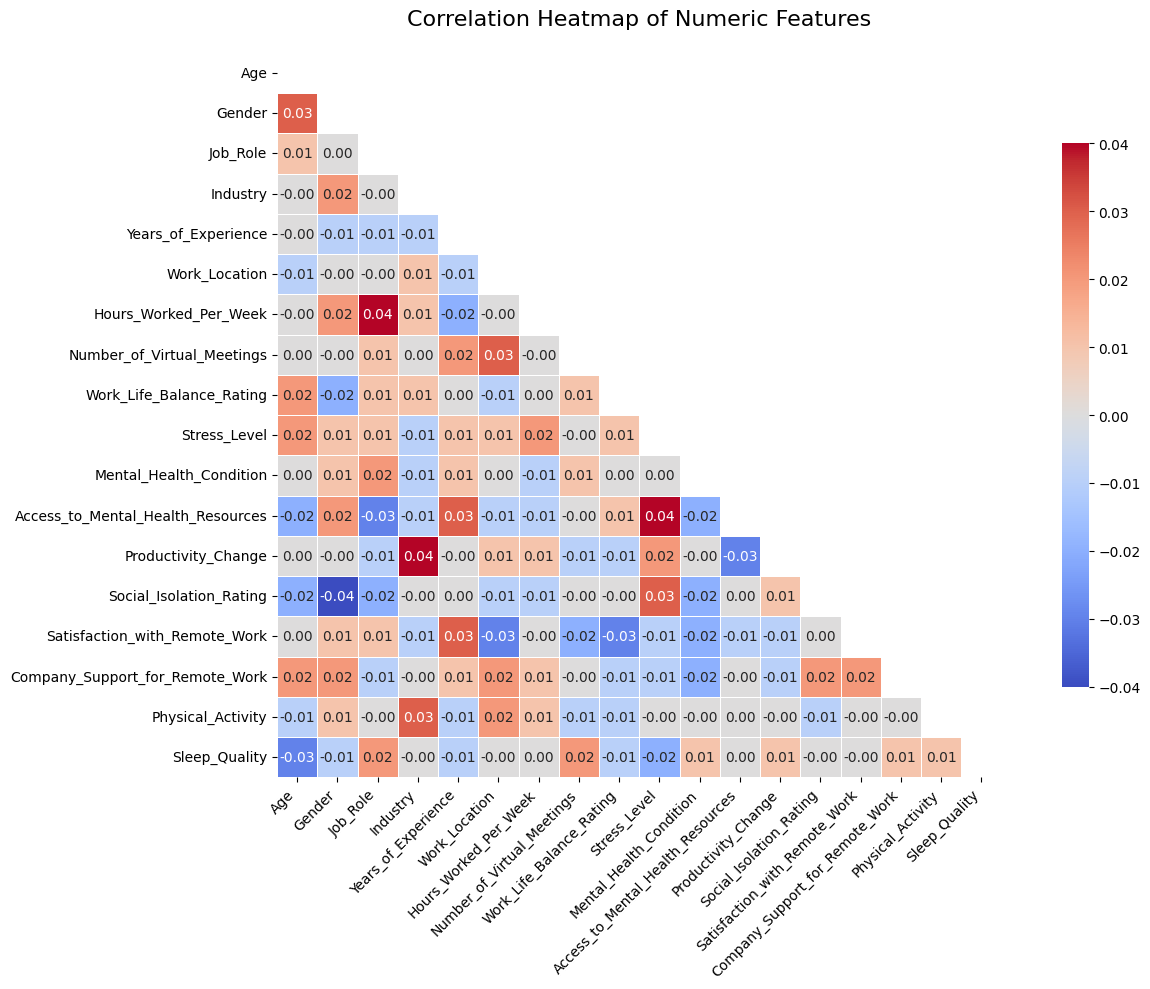

In [6]:
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = df_numeric.corr().round(2)

# Optional: sort columns based on correlation with target
target_col = 'Mental_State_Encoded'
if target_col in corr.columns:
    corr = corr.loc[:, corr.loc[target_col].abs().sort_values(ascending=False).index]
    corr = corr.loc[corr.loc[target_col].abs().sort_values(ascending=False).index]

# Mask upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True, cbar_kws={"shrink": 0.75})
plt.title("Correlation Heatmap of Numeric Features", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
# features = df.drop(columns=['Mental_Health_Condition', 'Employee_ID', 'Region'])

# for feature in features:
#     plt.figure(figsize=(6, 4))
#     sns.regplot(x=feature, y='Mental_Health_Condition', data=df, ci=None, scatter_kws={'alpha': 0.5})
#     plt.title(f"{feature} vs Mental State (Logistic Fit)")
#     plt.show()

ALGORITHM: LOGISTIC REGRESSION

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

X = df[['Gender', 'Job_Role', 'Years_of_Experience', 'Stress_Level']]
y = df['Mental_Health_Condition']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=df['Mental_Health_Condition'].unique())
print("Accuracy:", accuracy_score(y_test, y_pred))

ImportError: cannot import name '_safe_tags' from 'sklearn.utils._tags' (d:\Project\mental-health-detect-app\venv\Lib\site-packages\sklearn\utils\_tags.py)

ALGORITHM: RANDOM FOREST

Accuracy: 0.66725


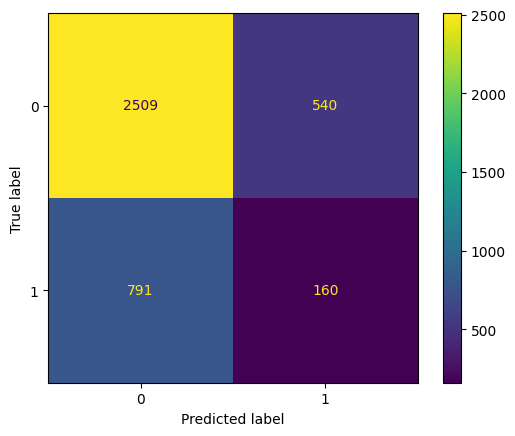

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

X = df.drop(columns=['Mental_Health_Condition', 'Employee_ID', 'Region'])
y = df['Mental_Health_Condition']

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred, display_labels=df['Mental_Health_Condition'].unique())
print("Accuracy:", accuracy_score(y_test, rf_y_pred))

In [ ]:
X_test

user_input = pd.DataFrame([{
    'Hours_Worked_Per_Week': 71,
    'Work_Life_Balance_Rating': 1,
    'Sleep_Quality_Ranked': 2,
    'Stress_Level_Ranked': 3
}])

test = rf_model.predict(user_input)[0]
if test == 1:
    print('good')
else:
    print('burnout')

burnout
